# Herleitung des 1. Keplerschen Gesetzes + Bahn mehrerer Planeten

In diesem Notebook wird das 1. Keplersche Gesetz (Planeten bewegen sich auf Ellipsenbahnen um die Sonne,und die Sonne ist in einem der Brennpunkte, hergeleitet.  

In [1]:
import numpy as np
import scipy, scipy.integrate
import matplotlib.pyplot as p

### Herleitung des 1. Keplerschen Gesetzes

Wir gucken uns zunächst die wirkenden Kräfte an. Dazu erscheint es sinnvoll, folgendes Referenzsystem zu wählen:
- Der Koordinatenursprung rotiert mit dem Planeten (d.h. es wirkt die Zentrifugalkraft)
- Die x-Achse definierne wir entlang des Radius, d.h. der Verbindungslinie von Sonne zum Planeten. 
- Die Sonne hat die Masse M, der Planet die Masse m

Unter diesen Bedingungen können wir die Kräfte 1-dimensional beschreiben, allerdings in Abhängigkeit vom Azimuthwinkel $\phi$:

$$F_{ges}(r,\phi) = m \frac{d^2r}{dt^2} = -G\frac{m M}{r^2} + m r \omega^2$$

Für eine perfekte Kreisbewegung ist $F_{ges} = 0$. Aber es geht hier um die Beschreibung einer elliptischen Bahn.

Wir können annehmen, dass der Drehimpuls $L = m r^2 \omega$ konstant ist. Dann wird unsere obige Bewegungsgleichung nach Dividieren durch die Masse $m$ des Planeten  und $\omega = \frac{L}{m r^2} $zu:

$$\frac{d^2r}{dt^2} = -G\frac{M}{r^2} + r \omega^2 = = -G\frac{M}{r^2} + \frac{L^2}{m^2 r^3}$$

Im Folgenden ersetzen wir $r = \frac{1}{u}$ und schreiben $\omega = \frac{d\phi}{dt}$. Damit folgt:

$$ L = m r^2 \omega =  \frac{m}{u^2}  \frac{d\phi}{dt} \Rightarrow \frac{d}{dt} = \frac{L u^2}{m}\frac{d}{d \phi}$$

jetzt müssen wir noch die Ableitungen $\dot{r}$ und $\dot(r)$ in der neuen Variable $u$ ausdrücken:

$$\frac{dr}{dt} = \frac{d}{dt} \frac{d}{du}\left( \frac{1}{u}\right) \frac{d}{dt} = -\frac{1}{u^2} \frac{du}{dt}$$

Mit dem Ausdruck $\frac{d}{dt}= \frac{L u^2}{m}\frac{d}{d \phi}$ aus der vorhergehenden Zeile können wir jetzt schreiben:

$$ \frac{dr}{dt} = -\frac{L u^2}{m} \frac{1}{u^2}  \frac{du}{d \phi} = -\frac{L }{m}  \frac{du}{d \phi} $$

Um die 2. Ableitung nach der Zeit zu berechnen, wenden wir erneut unseren Operator $\frac{d}{dt}= \frac{L u^2}{m}\frac{d}{d \phi}$ an und erhalten damit:

$$ \frac{d^2r}{dt^2} = \frac{L u^2}{m}\frac{d}{d \phi} \left( -\frac{L }{m}  \frac{d}{d \phi} \right) 
=  -\frac{L^2 u^2}{m^2}  \frac{d^2 u}{d \phi^2}  $$

Jetzt stellen wir diese Gleichung zunächst nach $\frac{d^2u}{d \phi^2}$ um 

$$
\frac{d^2u}{d \phi^2} =  - \frac{m^2}{L^2 u^2}\frac{d^2r}{dt^2}
$$

Jetzt ersetzen wir $\frac{d^2}{dt^2}$ aus der ursprünglichen Bewegungsgleichung:

$$
\frac{d^2u}{d \phi^2} = - \frac{m^2}{L^2 u^2} \left( -G\frac{M}{r^2} + \frac{L^2}{m^2 r^3} \right)
= - \frac{m^2}{L^2 u^2} \left( -G M u^2 + \frac{L^2  u^3}{m^2} \right)
= \frac{G M m^2}{L^2} - u
$$

Wir haben also ene Funktion, deren 2. Ableitung eine Konstante + die Funktion selbst ist. Dafür können wir den Ansatz machen, dass 

$$
u = A \cos{\phi} + B
$$

Die Ableitungen dieser Funktion sind:

$$
\frac{du}{d\phi} = -A \sin(\phi) \\
\frac{d^2u}{d\phi^2} = -A \cos(\phi) = -B -u  \\
$$

Damt folgt:

$$
B = -\frac{G M m^2}{L^2}
$$ 

$A$ ist ein Parameter, der frei gewählt werden kann. Wenn wir jetzt $u = \frac{1}{r}$ rücksubstituieren, erhalten wir

$$
\frac{1}{r} = B + A\cos(\phi)
$$

oder

$$
r = \frac{1}{B + A\cos(\phi)}
$$

Für $A = 0$ ist das ein perfekter Kreis. Für $A \neq 0$ wird dies eine Ellipse mit der Exzentrizität $A / B$. Nach unserer ursprünglichen Annahme bewegt sich dabei zwar die Sonne um die Erde, aber das ist nur eine Frage der Änderung des Referenzsystems. 

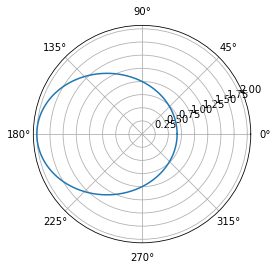

In [2]:
A = 0.5
B = 1
phi = np.linspace(0,2*np.pi,500)
r = 1/(B+A*np.cos(phi))
p.polar(phi,r)

Wenn wir die soeben dargestellt Funktion in den Koordinaten $x$ und $y$ darstellen, mit 

$$ x^2 + y^2 = r^2 $$

und 

$$
\cos(\phi) = \frac{x}{r} 
$$

so erhalten wir durch quadrieren der dargestellten Beziehung von $r$ und $\phi$:

$$
r^2 = x^2 + y^2 = \left(\frac{1}{B + A\cos(\phi)} \right)^2 = \left(\frac{1}{B + A \frac{x}{r}} \right)^2
= \frac{1}{B^2 + 2A B\frac{x}{r} + A^2 \frac{x^2}{x^2+y^2}} \\
\Rightarrow
\left(x^2 + y^2\right) \left( B^2 + 2AB \frac{x}{r} + A^2 \frac{x^2}{x^2+y^2} \right) = 1 \\
\Rightarrow
\frac{x^2 + y^2}{x^2+y^2} \left( B^2 \left[x^2+y^2 \right] + 2AB x r + A^2 x^2 \right) = 1 \\
\Rightarrow
B^2 y^2  + 2AB x r +  x^2 \left(A^2 + B^2\right) = 1
$$

Diese Gleichung kan anders ausgedrückt werden als 

$$
\left(B^2 - A^2\right) y^2  + \left(B x + A r \right)^2   = \left(B^2 - A^2\right) y^2  + B^2 x^2 +2 A B r x + A^2\left(x^2 + y^2\right) = B^2 y^2  + 2AB x r +  x^2 \left(A^2 + B^2\right) = 1
$$

Mit 

$$ b = \frac{1}{\sqrt{B^2 - A^2}} \\
a = \frac{1}{B}\\
x_0 = -\frac{Ar}{B} \\
y_0 = 0
$$

kann dies geschrieben werden als

$$
\left( \frac{x-x_0}{a}\right)^2 + \left( \frac{y-y_0}{b}\right)^2 = 1
$$

Dies entspricht der Ellipsengleichung, die in der VL gezeigt wurde.


In [3]:
# First, we define basic units
AU = 1.496e11 # 1 AU in metern
year = 365.25*24*60*60 # 1 Jahr in Skunden

M_So = 1.989e30 # Masse der Sonne in kg
M_Er = 5.972e24 # Masse der Erde in kg
M_Ma = 6.417e23 # Masse des Mars in kg
m_So = M_So/M_So # Masse der Sonne in solar-mass-units
m_Er = M_Er/M_So # Masse der Erde in solar-mass-units
m_Ma = M_Ma/M_So # Masse des Mars in solar-mass-units.
M = [m_So, m_Er, m_Ma]
G = 4 * np.pi**2

## Numerische Berechnung von Planetenbahnen in 3D

In diesem Notebook wird das System von Differentialgleichungen, die die Bahn von Erde und Mars um die Sonne berechnen, numerisch gelöst. Dafür muss bekannt sein:
- die Anfangsposition 
- der Anfangsgeschwindigkeitsvektor 
- die Masse
jedes beteiligten Himmelskörpers. Der Rest wird durch numerisches Integrieren der Bewegungsgleichung
$$
\ddot{\vec{r}}_i = \frac{1}{m_i}\left(-G\sum_{i,j}\frac{m_i m_j}{\left| \vec{r}_{i,j} \right|^2}\hat{r}_{i,j}\right) = 
-G\sum_{i,j}\frac{m_j}{\left| \vec{r}_{i,j} \right|^3}\vec{r}_{i,j}
$$
über die Zeit berechnet

Wir können jetzt die Funktion _scipy.integrate.odeint()_ nutzen, um die se Differentialgleichung zu lösen. Da diese Gleichung eine Differentialgleichung 2. ordnugn ist, müssen wir sie zunächst in eine Differntialgleichung 1. ordnugn umwandeln, indem wir die Geschwindigkeit $\vec{v\_i = \dot{\vec{r}}_i$ als separate Variable behandeln. Das System der Differntialgleichungen sieht dann folgendermaßen aus:
$$
\dot{\vec{v}}_i = -G\sum_{i,j}\frac{m_j}{\left| \vec{r}_{i,j} \right|^3}\vec{r}_{i,j} \\
\dot{\vec{r}}_i = \vec{v}_i
$$

jeder Planet wird also mit den folgenden 6 Parametern beschrieben:
- $x_i$
- $y_i$
- $z_i$
- $v_{x,i}$
- $v_{y,i}$
- $v_{z,i}$

mit $\vec{r}_i = (x_i, y_i, z_i) $ und $\vec{v}_i = (v_{x,i},v_{y,i}, v_{z,i})$.



In [4]:
def grav_force_3D(y, this_planet, dim):
    section_len = 6 # number of variables used to describe each object (x,vx,y,vy,z,vz)
    if dim == "x":
        coord_offset = 0 # x-coord is the 0th in the 6-length vector section.
    elif dim == "y":
        coord_offset = 2 # y-coord is the 2nd in the 4-length vector section.
    elif dim == "z":
        coord_offset = 4 # y-coord is the 4th in the 6-length vector section.

    this_offset = section_len * this_planet # where in the big y-vector is the celestial body we're considering?
    grav = 0. # define variable.
    for i in np.arange(len(M)): # Iterate over planets to determine the pairwise gravitational forces.
        if i == this_planet:
            pass # no self-interaction force.
        else:
            dx = y[this_offset] - y[section_len*i]
            dy = y[this_offset + 2] - y[section_len*i + 2]
            dz = y[this_offset + 4] - y[section_len*i + 4]
            grav_t = (y[this_offset + coord_offset] - y[section_len*i + coord_offset]) # First, the vector component
            grav_t /= np.sqrt(dx**2 + dy**2 + dz**2)**3 # Divide by distance cubed.
            grav_t *= -G * M[i] # Multiply by constants.
            grav += grav_t
    return grav

# This is the function that defines the derivative of the generalized vector y with respect to time:
def state_function_3D(y,t):
    section_len = 6 # number of variables used to describe each object (x,vx,y,vy,z,vz)
    n_planets = len(M) # Number of planets is the length of the global variable M (the planet masses). 
    f_out = np.zeros((int(section_len * n_planets)),"float64")
    for i in np.arange(n_planets):
        offset = section_len * i # each planet has x', x"", y', y" components.
        f_out[offset + 0] = y[offset + 1]
        f_out[offset + 1] = grav_force_3D(y, this_planet=i, dim="x")
        f_out[offset + 2] = y[offset + 3]
        f_out[offset + 3] = grav_force_3D(y, this_planet=i, dim="y")
        f_out[offset + 4] = y[offset + 5]
        f_out[offset + 5] = grav_force_3D(y, this_planet=i, dim="z")
    return f_out

Im Folgenden definieren wir die Koordinaten der Planeten im Ruhesystem der Sonne (ist nicht exakt das Schwerpunktsystem). 

In [5]:
r_So = np.array([0., 0., 0.])
r_Er = np.array([0.84, 0.50, -0.06])
r_Ma = np.array([1.51, -0.18, 0.04])
v_Er = np.array([-3.650, 5.214,0.608])       
v_Ma = np.array([0.521, 5.214, -0.456])
v_So = -(v_Er*m_Er+v_Ma*m_Ma)/m_So

# Now, let's subtract the center of gravity from everything:
r_CG = r_Er*m_Er+r_Ma*m_Ma+ r_So*m_So


section_len = 6 # number of variables used to describe each object (x,vx,y,vy,z,vz)

y0 = [r_So[0],                         # initial x-position of the sun
      v_So[0],                         # initial x-velocity of the sun 
      r_So[1],                         # initial y-position of the sun
      v_So[1],                         # initial y-velocity of the sun 
      r_So[2],                         # initial z-position of the sun
      v_So[2],                         # initial z-velocity of the sun  
      r_Er[0],                         # initial x-position of the earth
      v_Er[0],                         # initial x-velocity of the earth 
      r_Er[1],                         # initial y-position of the earth
      v_Er[1],                         # initial y-velocity of the earth 
      r_Er[2],                         # initial z-position of the earth
      v_Er[2],                         # initial z-velocity of the earth  
      r_Ma[0],                         # initial x-position of mars
      v_Ma[0],                         # initial x-velocity of mars 
      r_Ma[1],                         # initial y-position of mars
      v_Ma[1],                         # initial y-velocity of mars 
      r_Ma[2],                         # initial z-position of mars
      v_Ma[2]]                         # initial z-velocity of mars  


Jetzt definieren wir die Zeit, über die wir integrieren möchten:

In [6]:
timespan = np.linspace(0,20,10001) # Define the timespan and temporal resolution over which it runs.

Jetzt können wir die Integration aufrufen:

In [7]:
y = scipy.integrate.odeint(state_function_3D,y0,t=timespan,rtol=1e-10,mxstep=10000000)

### Darstellung der numerischen Ergebnisse

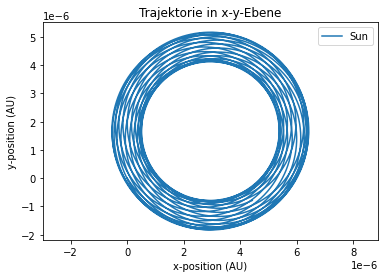

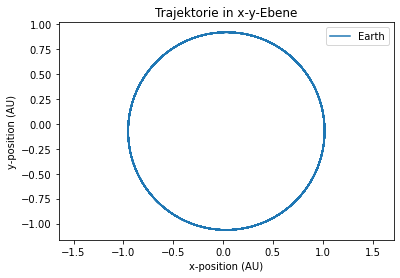

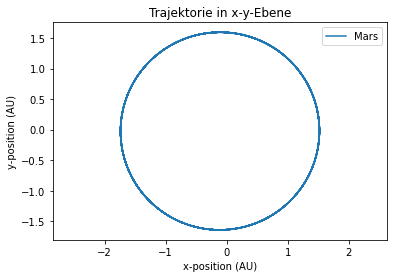

In [8]:
# Now, let's plot the results in the x-y-plane.
for i in np.arange(len(M)):
    fig = p.figure(i)
    p.plot(y[:,section_len*i], y[:,section_len*i+2], ls="-", label=["Sun","Earth","Mars"][i])
    p.xlabel("x-position (AU)")
    p.ylabel("y-position (AU)")
    p.axis("equal") # Make it look properly square
    #p.gca().set_aspect('equal', 'box')
    p.legend()
    p.title('Trajektorie in x-y-Ebene')
p.show()



### Darstellung aller 3 Himmelskörper 

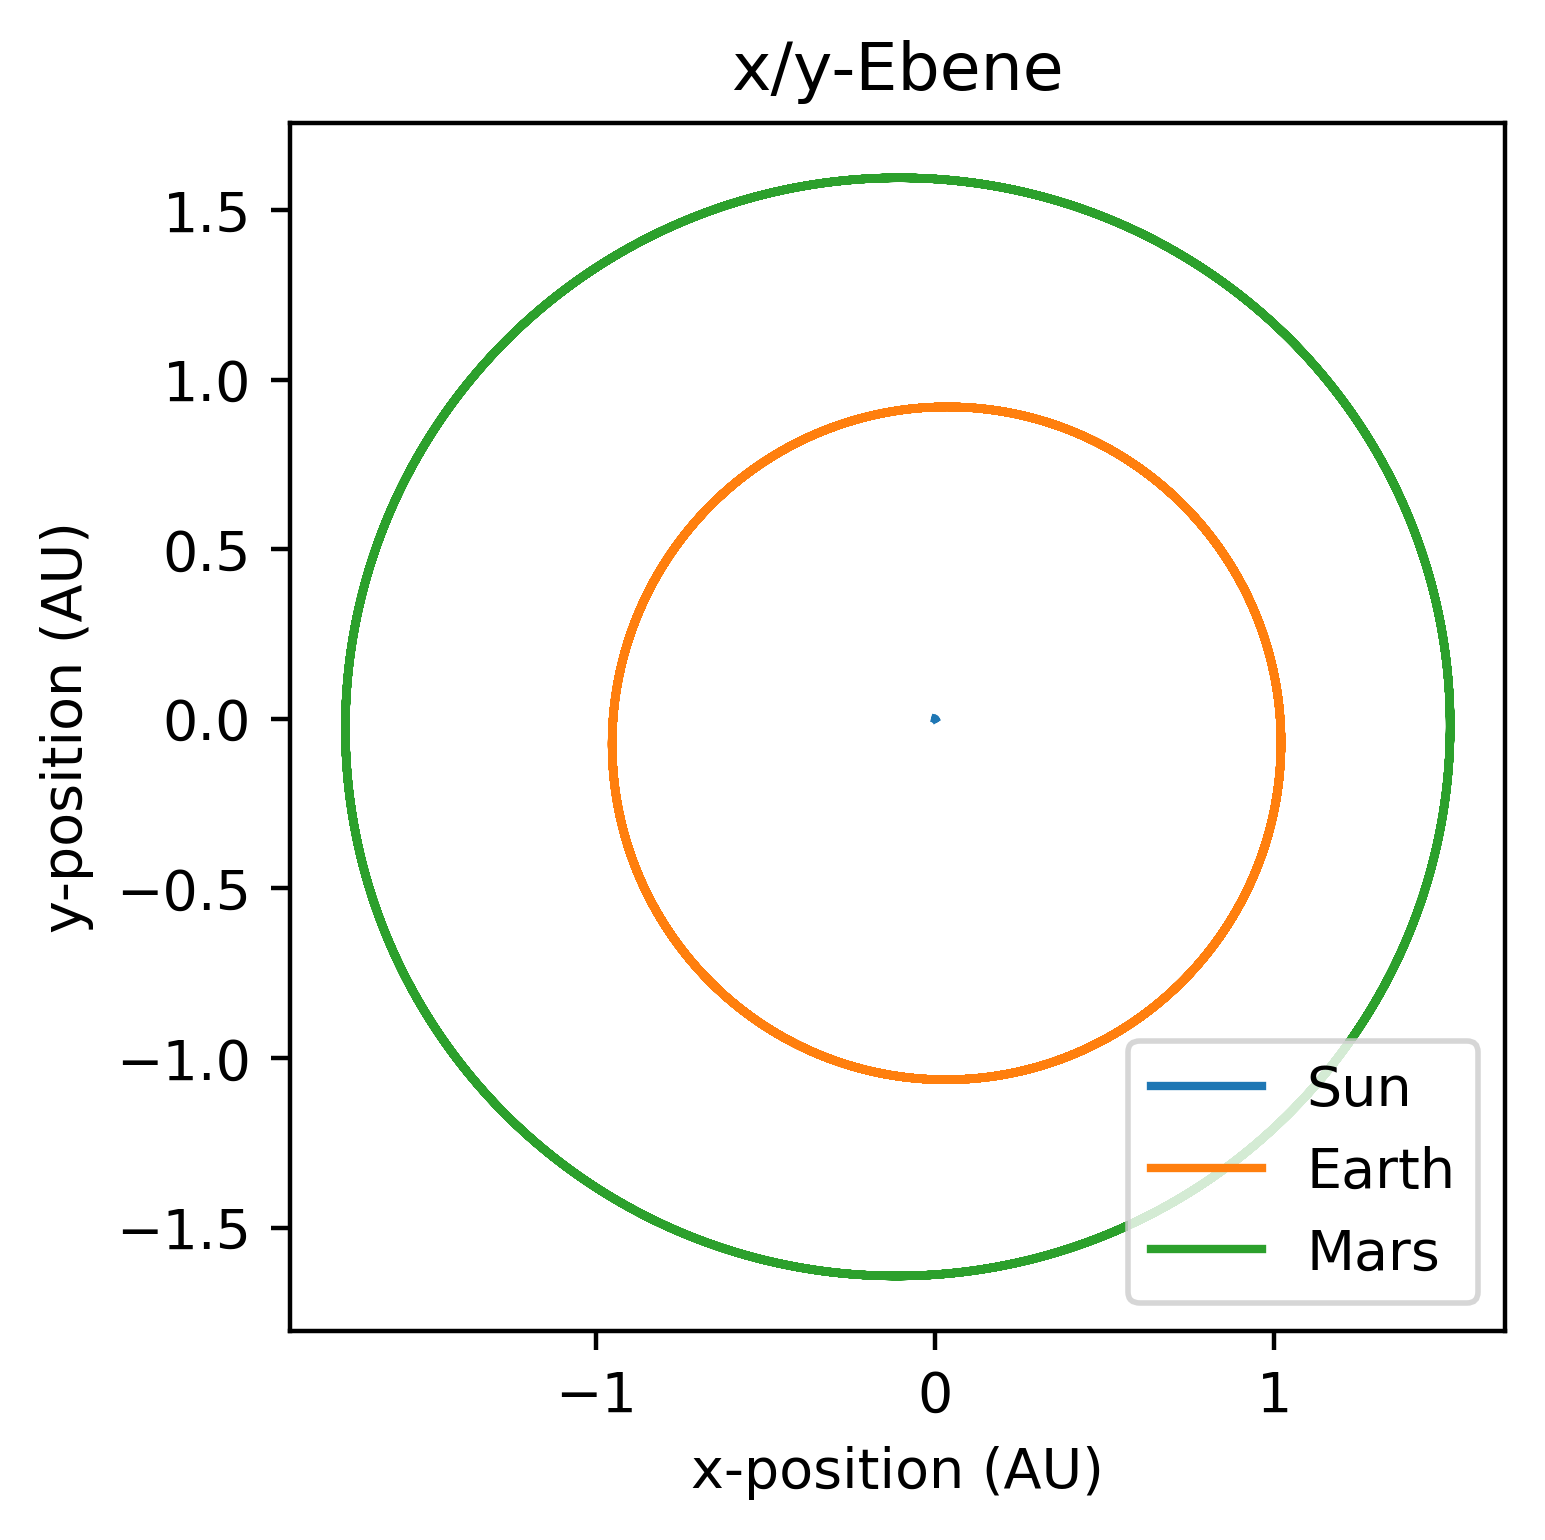

In [9]:
# Now, let's plot all three in x,y
p.figure(3,dpi=400)
for i in np.arange(len(M)):
    p.plot(y[:,section_len*i], y[:,section_len*i+2], ls="-", label=["Sun","Earth","Mars"][i])
    p.xlabel("x-position (AU)")
    p.ylabel("y-position (AU)")
    p.axis("equal") # Make it look properly square
    p.legend()
p.title("x/y-Ebene")
p.gca().set_aspect('equal', 'box')
p.show()

### Darstellung in der x-z-Ebene

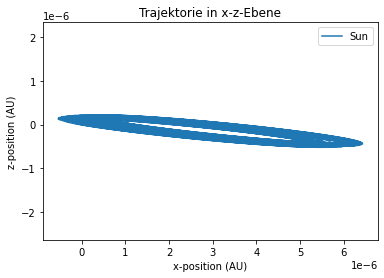

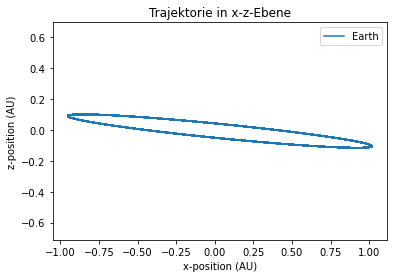

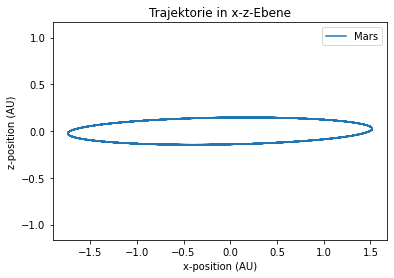

In [10]:
# Now, let's plot the results in the x-z-plane.
for i in np.arange(len(M)):
    fig = p.figure(i)
    p.plot(y[:,section_len*i], y[:,section_len*i+4], ls="-", label=["Sun","Earth","Mars"][i])
    p.xlabel("x-position (AU)")
    p.ylabel("z-position (AU)")
    p.axis("equal") # Make it look properly square
    #p.gca().set_aspect('equal', 'box')
    p.title('Trajektorie in x-z-Ebene')
    p.legend()
p.show()

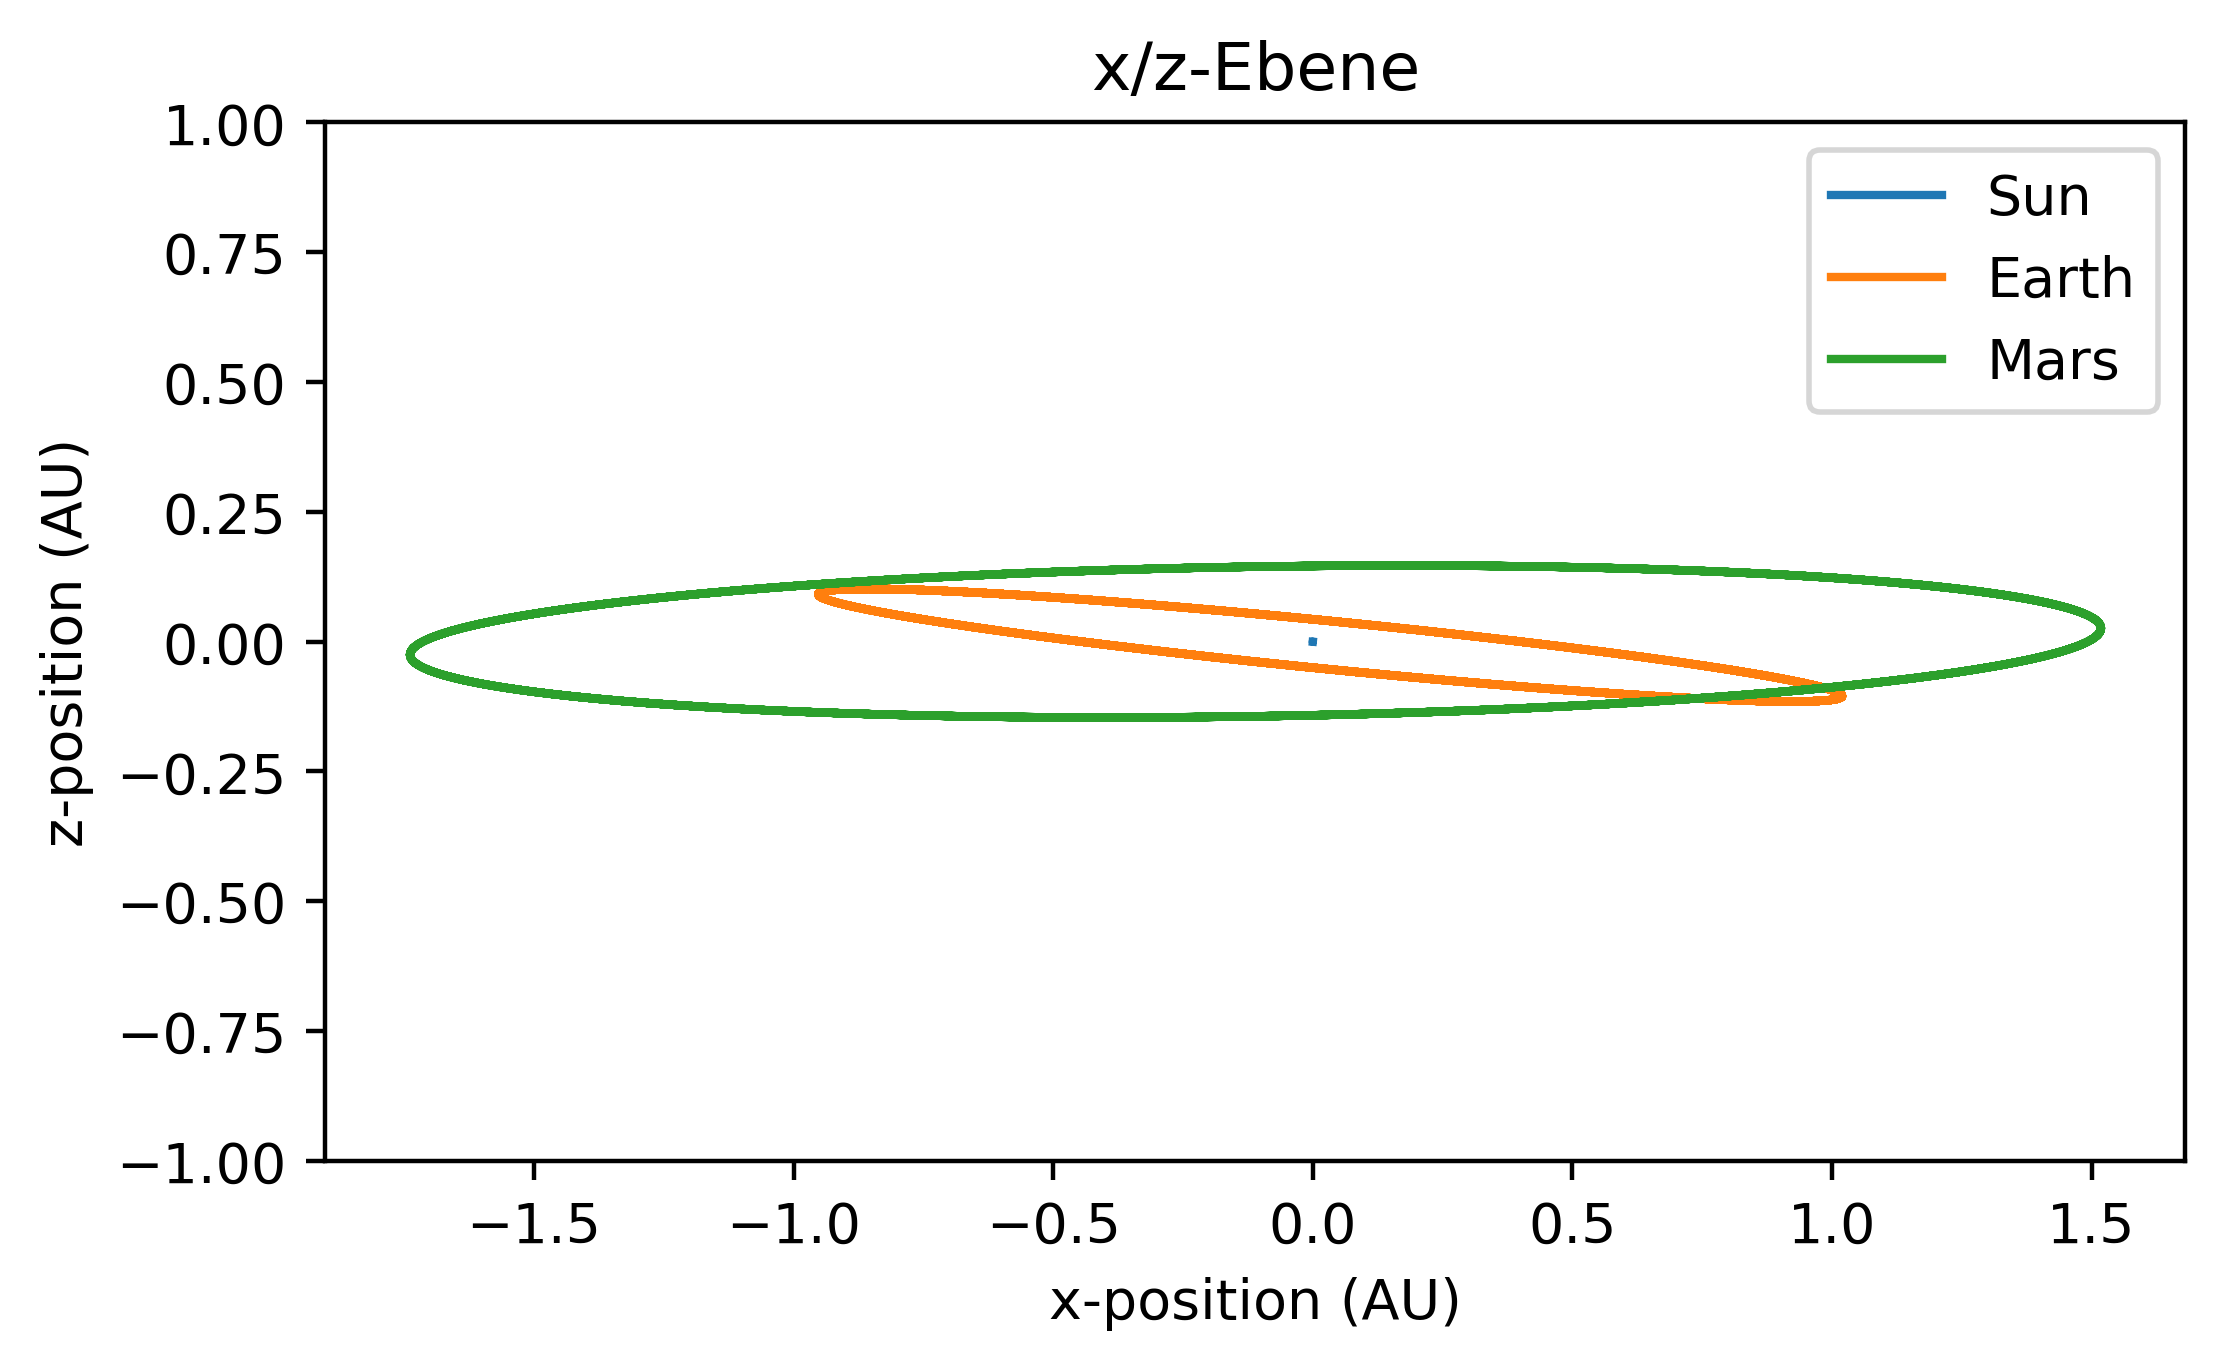

In [11]:
# Now, let's plot all three in x,z
p.figure(5,dpi=400)
for i in np.arange(len(M)):
    p.plot(y[:,section_len*i], y[:,section_len*i+4], ls="-", label=["Sun","Earth","Mars"][i])
    p.xlabel("x-position (AU)")
    p.ylabel("z-position (AU)")
    p.axis("equal") # Make it look properly square
    p.legend()
p.title("x/z-Ebene")
p.gca().set_aspect('equal', 'box')
p.ylim(-1, 1)
p.show()

### Position des Mars relativ zur Erde

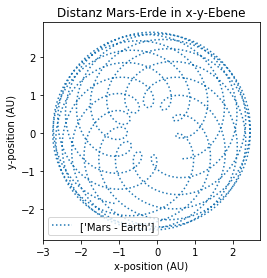

In [12]:
# we define indices to make it easier to address the different objects. 
# These indices have to be multiplied by 4, because we store 4 variables per object:
sun   = 0*section_len
earth = 1*section_len
mars  = 2*section_len

em_x = y[:,mars] - y[:,earth]
em_y = y[:,mars+2] - y[:,earth+2]
em_z = y[:,mars+4] - y[:,earth+4]
p.figure(10)
p.plot(em_x, em_y, ls=":", label=["Mars - Earth"])
# p.axis("equal")
p.gca().set_aspect('equal', 'box')
p.xlabel("x-position (AU)")
p.ylabel("y-position (AU)")
p.title("Distanz Mars-Erde in x-y-Ebene")
p.legend()
p.show()

### Darstellung der Distanz von Erde und Mars

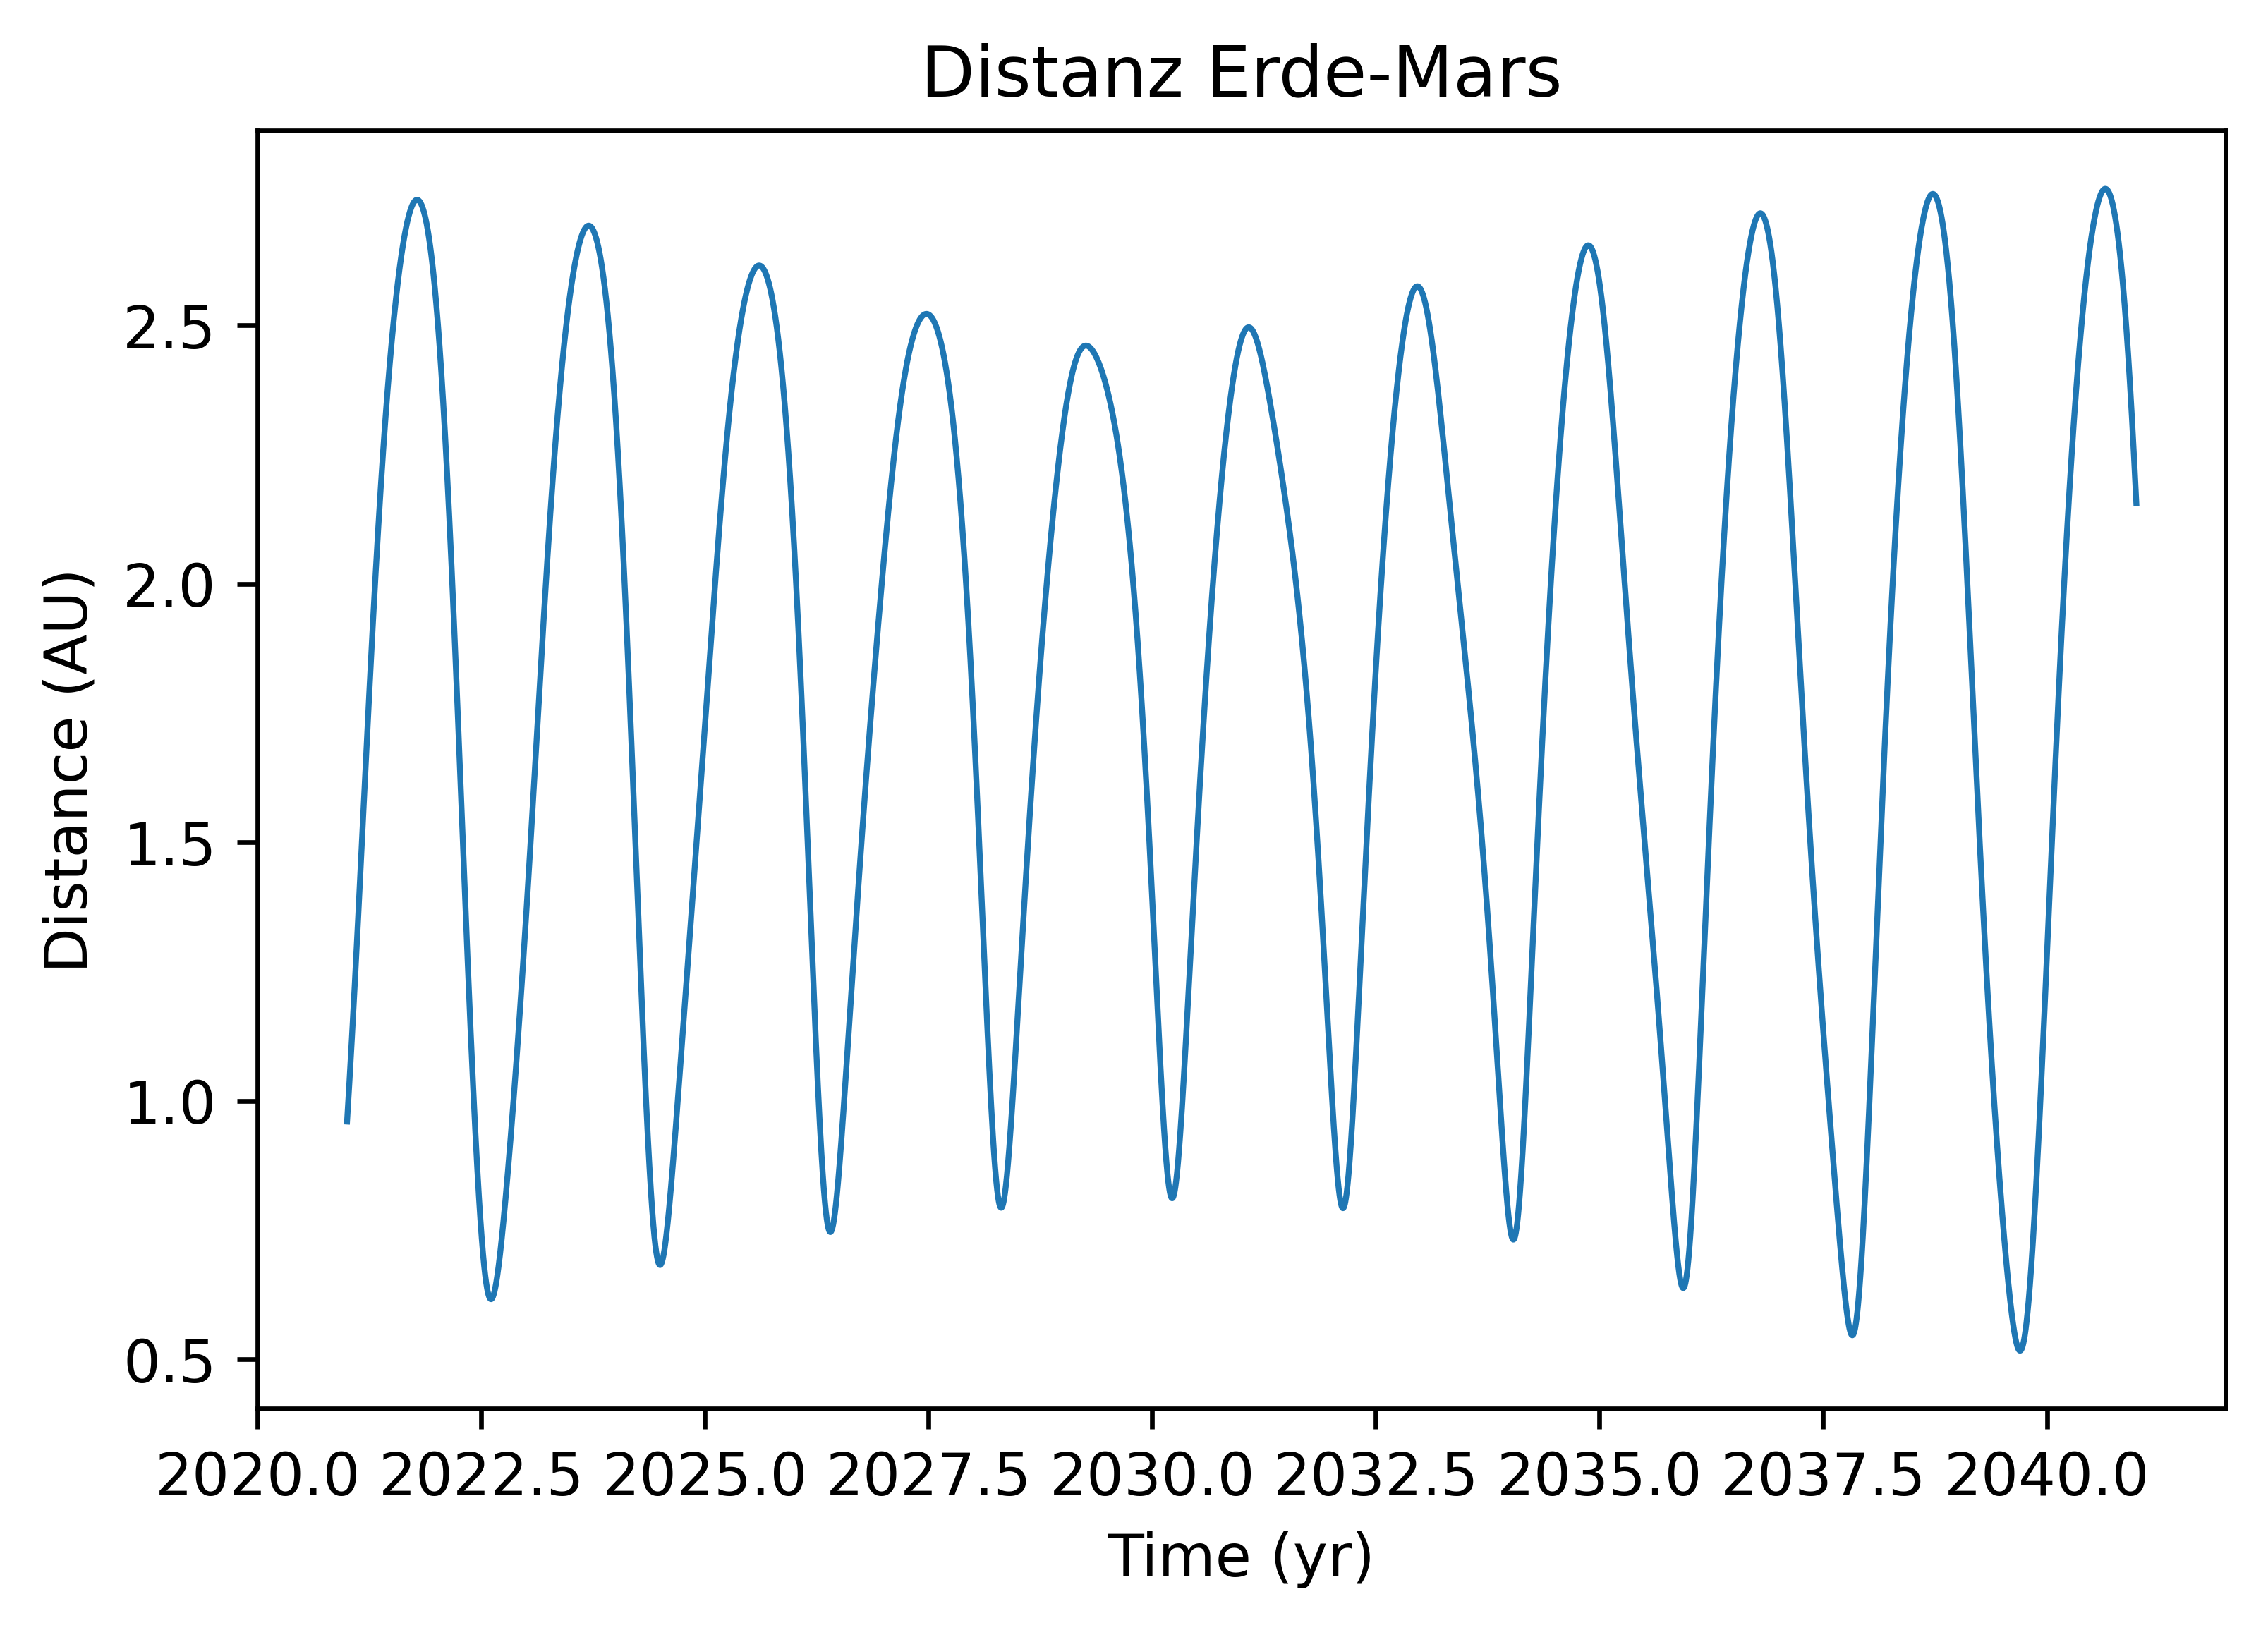

In [13]:
# Huh. Let's examine those wiggles a bit more closely:
p.figure(21,dpi=600)
p.plot(timespan+2021,np.sqrt(em_x**2+em_y**2+em_z**2),lw=1,label="Mars distance from Earth")
p.xlabel("Time (yr)")
p.ylabel("Distance (AU)")
p.title("Distanz Erde-Mars")
p.show()

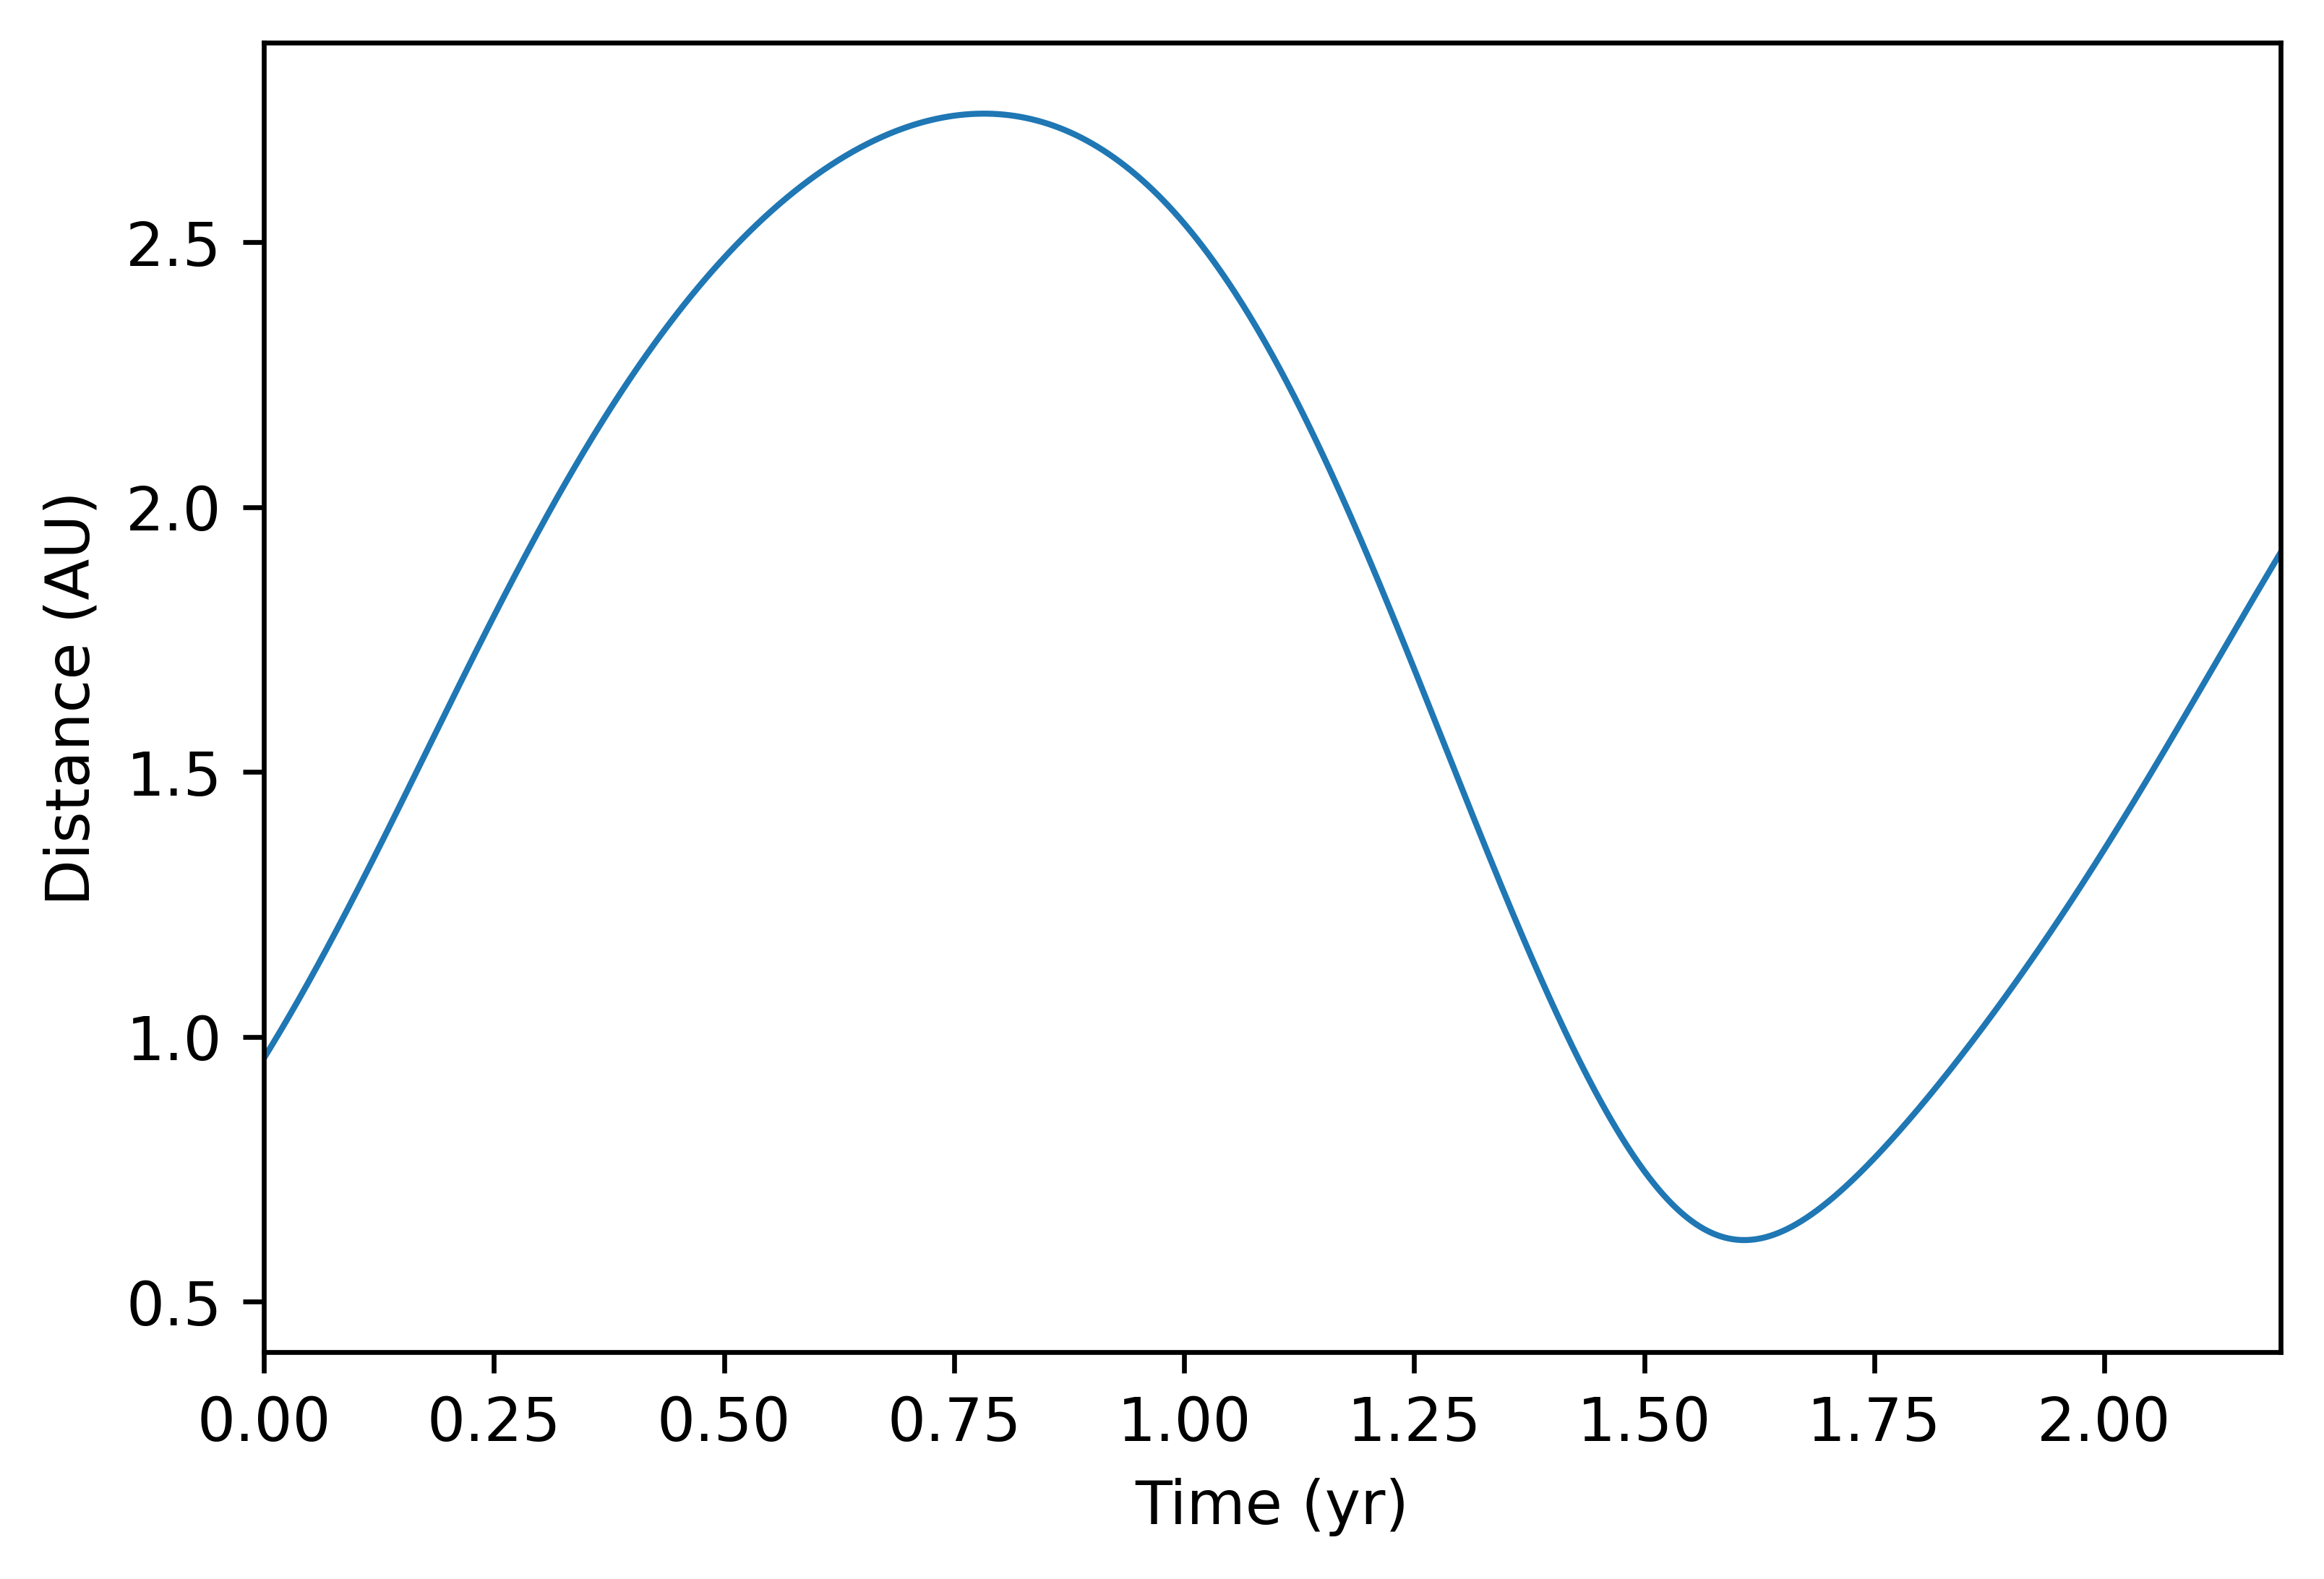

In [14]:
# Now, let's look at a time span of 800 days years (roughly the synodic period, varies between 764 und 811 days):
p.figure(21,dpi=600)
p.plot(timespan,np.sqrt(em_x**2+em_y**2+em_z**2),lw=1,label="Moon distance from Earth")
p.xlabel("Time (yr)")
p.ylabel("Distance (AU)")
p.xlim(0,800/365)
p.show()